# Project: Investigate a Dataset - [European soccer database analysis]

## Table of Contents
### Question asking
### Data loading
### Check data for it's nature and quality
### Analysing and forming new data sets to plot
### Plotting
### Conclusions

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Hint**: Here we are going to investigate soccer data  to find hidden information from data. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016 .

>**This** kind of data is gathered from different data table
## 1 - country
#### Contains countries names with their id
## 2 - league 
#### Contains league's names with their id
## 3-match 
#### This table contains data about matches with their goals (home or away) , the date,league ,and country these goals where scored in
#### This table is directly related to the player's , league ,  table ,  country , and teams table
## 4-player 
#### Contains palyer's id ,names , heights and weights 
## 5-player_attributes 
#### Contains player's api id and overall rating and other ratings
## 6-team 
#### Contains team api id and team's long and short names
## 7-team_attribute 
#### Contains team api id and other team characteristics

## Question to be asked
#### 1 - The difference between teams' abilities to score a goal in their homes vs away goals
#### 2 - How many home goals a team score for each away goal
#### 3 - How the overall rating is affected by the palyer's height
#### 4 -  The most powerful leagues during this time
#### 5 - The variation of a league's total goals during this duration
#### 6 - how the variation (distribution) of palyer's lengths may look like 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling
### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
country = pd.read_csv('Country.csv')
country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [4]:
league = pd.read_csv('League.csv')
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [5]:
match = pd.read_csv('Match.csv')
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,1.67,4.35,3.40,1.70,4.50,3.40,1.70,NaN,NaN,NaN
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,3.10,2.25,3.25,2.80,2.20,3.30,2.80,2.25,3.20,2.80
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00


In [6]:
player = pd.read_csv('Player.csv')
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [7]:
player_attributes = pd.read_csv('Player_Attributes.csv')
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [8]:
team = pd.read_csv('Team.csv')
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [9]:
team_attribute = pd.read_csv('Team_Attributes.csv')
team_attribute.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


# Here i am going to answer the first question 
# 1 - The difference between teams' abilities to score a goal in their homes vs away goals

# Checking data quality for match and team tables

In [10]:
# 1 - check the nature of data (shape , null values , column types , and duplicated values)
# 2 - slicing the targeted data (some certain columns) from each original targeted dataframe to help answer questions
# 3 - creating data to be plotted 
# 4 - plotting with matplotlib
# 5 - deductions from from the plot

In [11]:
# check the nature of data (shape , null values , column types , and duplicated values)

In [12]:
# realize the amount of data
print(match.shape)

(25979, 115)


In [13]:
# check for null values for columns we are interested in
print(match.iloc[:,[7,8,9,10]].isnull().any())

home_team_api_id    False
away_team_api_id    False
home_team_goal      False
away_team_goal      False
dtype: bool


In [14]:
print(match.iloc[:,[7,8,9,10]].dtypes)

home_team_api_id    int64
away_team_api_id    int64
home_team_goal      int64
away_team_goal      int64
dtype: object


In [15]:
print(match.iloc[:,[7,8,9,10]].duplicated().any())

True


In [16]:
team.shape

(299, 5)

In [17]:
print(team[['team_api_id','team_long_name']].isnull().any())

team_api_id       False
team_long_name    False
dtype: bool


In [18]:
print(team[['team_api_id','team_long_name']].dtypes)

team_api_id        int64
team_long_name    object
dtype: object


In [19]:
print(team[['team_api_id','team_long_name']].duplicated().any())

False


#### slicing the targeted data (some certain columns) from each original targeted dataframe to help answer questions

In [20]:
# slicing match table to get the sum of away goals for each team
match_goals_away = match[['away_team_api_id'  , 'away_team_goal']].sort_values('away_team_api_id').groupby('away_team_api_id',as_index=False).sum()

In [21]:
# slicing match table to get the sum of home goals for each team
match_goals_home = match[['home_team_api_id' , 'home_team_goal' ]].sort_values('home_team_api_id').groupby('home_team_api_id',as_index=False).sum()

In [22]:
# merging these two tables to get the home and away goals for each team
sum_goals_for_team = match_goals_home.merge(match_goals_away , how='inner' ,left_on ='home_team_api_id',right_on='away_team_api_id')
sum_goals_for_team.head()

,home_team_api_id,home_team_goal,away_team_api_id,away_team_goal
0,1601,148,1601,132
1,1773,74,1773,52
2,1957,176,1957,111
3,2033,70,2033,68
4,2182,215,2182,157


In [23]:
# adding this column to be able to sort teams by their total number of goals which we can say is an indicator for team's strength
sum_goals_for_team['total_goals'] = sum_goals_for_team['home_team_goal']+sum_goals_for_team['away_team_goal']

In [24]:
# here is the sort method to see the most scoring goals team
sum_goals_for_team = sum_goals_for_team.sort_values('total_goals',ascending=False)
#delete sum_goals_for_team.head()

In [25]:
# slicing a dataframe to merge with team_id_name dataframe to see each team_api_id , this team's home ,away , and total goal
sum_goals_for_team_merge = sum_goals_for_team[['home_team_api_id','home_team_goal','away_team_goal','total_goals']]

In [26]:
# here i am slicing the data i want from team table that is team_api_id and team_long name 
# we get a table for team_api_id and it's long name 
# hint i did not use the team short name as i won't familiar to alot of people who don't know alot about football
# did this step to use team's name instead of team's api id which is meaningful to reader
team_id_name = team[['team_api_id','team_long_name']]

In [27]:
# here i am trying to get the sum of away and home goals for each table in a single dataframe
team_goals = team_id_name.merge(sum_goals_for_team_merge ,how='inner',right_on='home_team_api_id',left_on='team_api_id')


In [28]:
# not that i no linger need team's api id and home team api id columns so i slice to remove them
#team_goals = team_goals.iloc[: , [1,3,4,5]].sort_values('total_goals',ascending=False)
team_goals.head()          #delete

,team_api_id,team_long_name,home_team_api_id,home_team_goal,away_team_goal,total_goals
0,9987,KRC Genk,9987,205,143,348
1,9993,Beerschot AC,9993,112,62,174
2,10000,SV Zulte-Waregem,10000,176,130,306
3,9994,Sporting Lokeren,9994,149,130,279
4,9984,KSV Cercle Brugge,9984,119,94,213


#### Creating data to be plotted 

In [29]:
# Creating lists to be plotted
# this list contains name of top 12 scoring teams
# it will be used in x-labels
top_12_scoring_teams = team_goals['team_long_name'][:12].tolist()

In [30]:
# get the sum of home_scored_goals for top 12 teams
home_goals_for_top_12_team = team_goals['home_team_goal'][:12].tolist()

In [31]:
# get the sum of away_scored_goals for top 12 teams
away_goals_for_top_12_team = team_goals['away_team_goal'][:12].tolist()
away_goals_for_top_12_team             #delete

[143, 62, 130, 130, 94, 180, 177, 53, 23, 142, 123, 186]

# plotting area

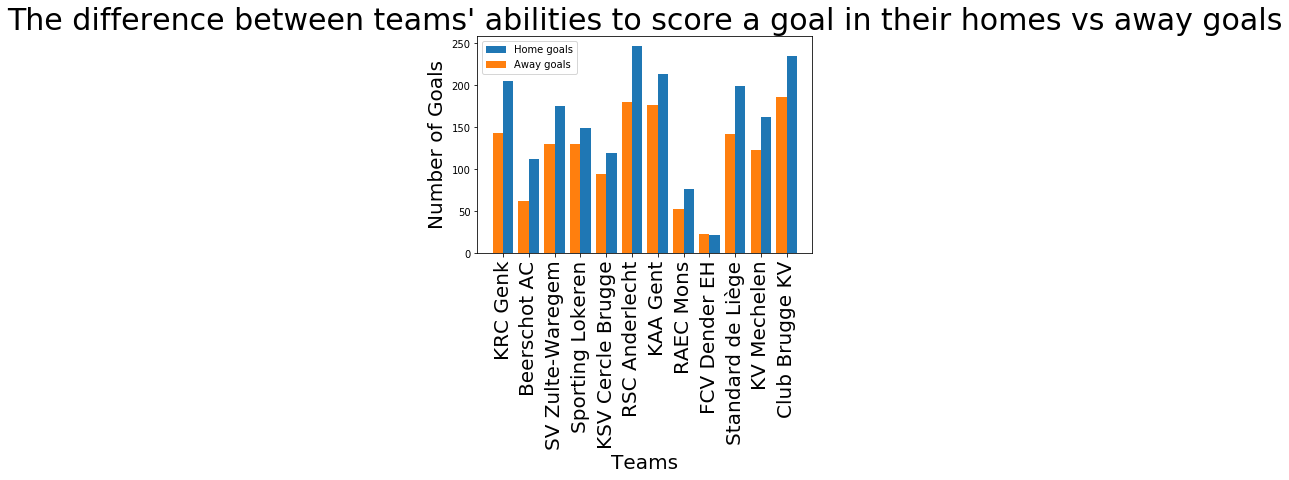

In [32]:
# plotting area
width=0.4
values=np.arange(len(top_12_scoring_teams))
plt.bar(values+width/2, home_goals_for_top_12_team , width , label='Home goals')
plt.bar(values-width/2 ,away_goals_for_top_12_team , width , label ='Away goals' )


plt.xticks(values , top_12_scoring_teams,fontsize  = 20 , rotation = 'vertical')
plt.title("The difference between teams' abilities to score a goal in their homes vs away goals",fontsize = 30 )
plt.ylabel('Number of Goals',fontsize = 20)
plt.xlabel('Teams',fontsize = 20)

plt.rcParams["figure.figsize"] = (30, 12)
plt.legend()
plt.show()

#### deduction
### it seems to a very far extent that a team is always capable of scoring goals in his land more that away matches 

# Answering question two
# 2 - how many home goals a team score for each away goal

#### data nature is checked in question one and it is the same data so no reapitition is needed

#### slicing targeted data and creating data to be plotted

In [33]:
# here i will calculate the percentage of home goals to away goals and visualize it for the 12 scoring teams
#Creating lists to be plotted
team_goals['home_to_away'] = team_goals['home_team_goal']/team_goals['away_team_goal']

#### Plotting area

In [34]:
# defining a function to bar plot some data 
# parameters 
# 1 - locations on x-axis (loc)
# 2 - values on y-axis (values)
# 3 - labels that is naming for x-axis (label)
# 4 - rotation of x_labels (rot)
# 5 - plot x-axis label (x_title)
# 6 - plot y-axis label (y_title)
# 7 - plot title (plot_title)
# 8 - fonsize for the size of whole texts in the plot cell (fsz)

In [35]:
def bar_plot (loc , values , label , rot , x_title , y_title , plot_title , fsz) :
    """This function is used to plot bar plots.
    INPUT 
    loc : list , that is the list of x-coordinates to plot on
    values : list , that is the list of y-coordinates of the plot
    labels : list , that is the name that appear on x-axis
    rot : str , that can be either 'vertical' or 'horizontal' 
    x_title : str ,that is the x-axis name that is what this axis represents
    y_title : str ,that is the y-axis name that is what this axis represents
    plot_title : str , that is what this chart represents
    fsz : int that is the size of texts in the graph
    OUTPUT
    a bar plot
    """
    x = plt.xlabel(x_title ,fontsize = fsz)
    y = plt.ylabel(y_title,fontsize = fsz)
    t = plt.title(plot_title , fontsize = fsz*1.4)
    a = plt.xticks(loc , label , fontsize = fsz , rotation = rot )
    plot = plt.bar(loc , values)
    return plot , a , x , y , t 

(<Container object of 12 artists>,
 ([<matplotlib.axis.XTick at 0x7fc174d751d0>,
  <a list of 12 Text xticklabel objects>),
 Text(0.5,0,'Teams'),
 Text(0,0.5,'How many away goals are there for a single home goal'),
 Text(0.5,1,'Teams'))

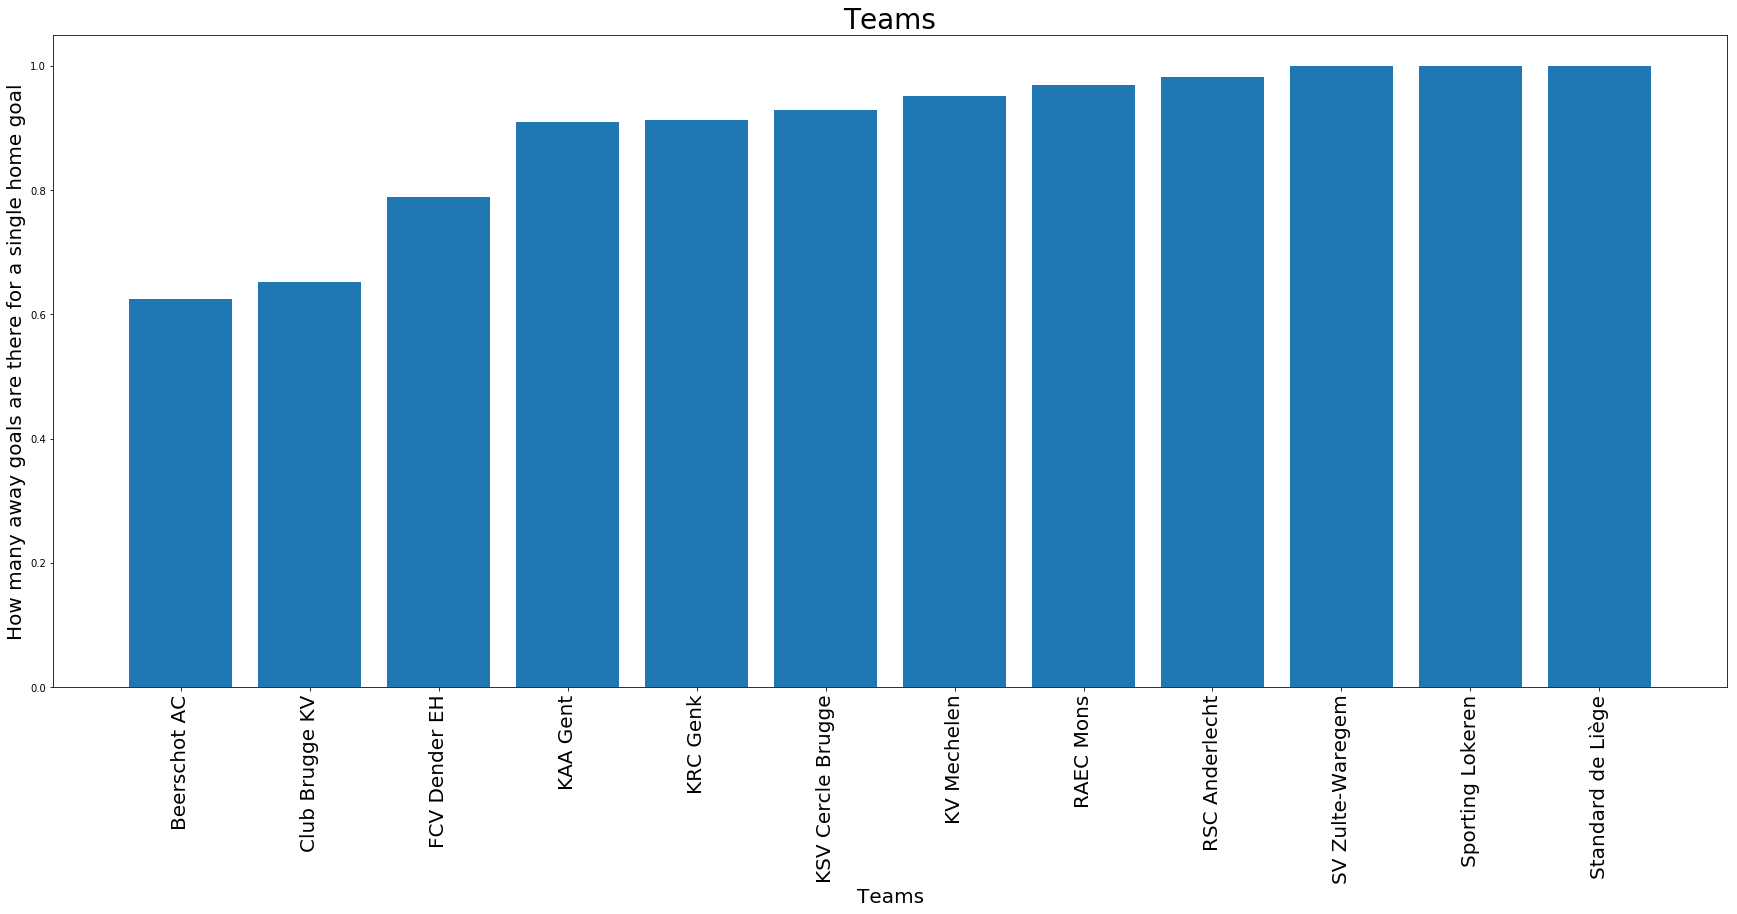

In [36]:
# using function to avoid repeatitve code
loc = np.arange(team_goals['team_long_name'][:12].nunique())
values = team_goals['home_to_away'].sort_values().iloc[:12] 
label = team_goals['team_long_name'][:12].sort_values().tolist()
bar_plot(loc ,values ,label , rot = 'vertical' , x_title = 'Teams' , y_title = 'How many away goals are there for a single home goal' ,plot_title = 'Teams' , fsz = 20)

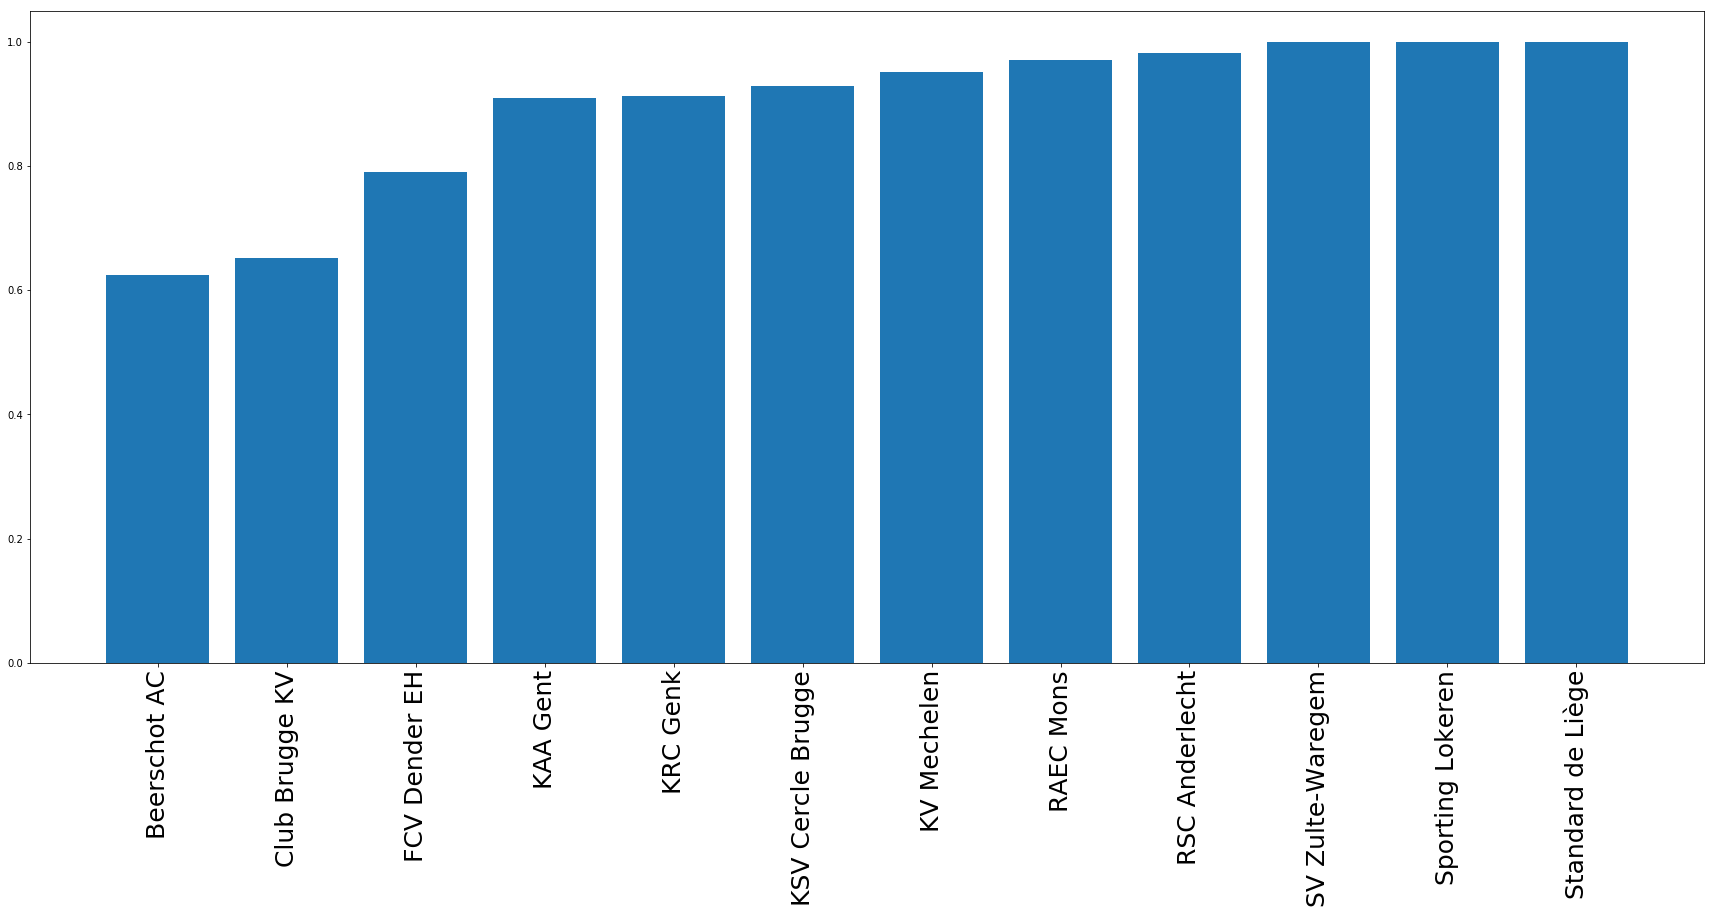

In [37]:
#this cell might be deleted
# plotting without the function
location = np.arange(team_goals['team_long_name'][:12].nunique())
plt.xticks(location ,team_goals['team_long_name'][:12].sort_values().tolist(),fontsize  = 25 , rotation = 'vertical')
plt.bar(location ,team_goals['home_to_away'].sort_values().iloc[:12] )
plt.show()

#### Conclusion
### Here we find some teams that can score more on away matches  but the whole data about these teams are not big for this kind of analysis
### Teams like sv Zulte-wargem , sporting lokeren ,and standard de liege socore home goals as away goals and we can consider these teams as they are strong teams 
### My conclusion here is not so strong because the amount of whole data about these teams are not big to be analysed

# Answering question 3
# How the overall rating is affected by the palyer's height

#### Checking nature of data

In [38]:
print(player.shape)

(11060, 7)


In [39]:
player.dtypes

id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object

In [40]:
player.isnull().any()

id                    False
player_api_id         False
player_name           False
player_fifa_api_id    False
birthday              False
height                False
weight                False
dtype: bool

In [41]:
player.duplicated().any()

False

In [42]:
print(player_attributes.shape)

(183978, 42)


In [43]:
player_attributes.iloc[: , [2,4]].dtypes

player_api_id       int64
overall_rating    float64
dtype: object

In [44]:
player_attributes.iloc[: , [2,4]].isnull().any()

player_api_id     False
overall_rating     True
dtype: bool

In [45]:
# slicing the played_api_id and overall_rating from player attributes table
player_overall_rating = player_attributes.iloc[: , [2,4]]
#delete player_overall_rating.head()

In [46]:
# how many these null are
print(player_overall_rating.isna().sum())

player_api_id       0
overall_rating    836
dtype: int64


In [47]:
# for simplicity i will drop null values from player_attributes (they represent about 0.45% of the total data)
# in another project(in which i have more time)i would have to see if these missing data is ralated to some certain players
# and how this will affect our results
player_overall_rating.dropna(inplace=True)
print(player_overall_rating.shape)

(183142, 2)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [48]:
player_overall_rating.duplicated().any() 
# this represents no problem if true because each player might have a rating for each time interval

True

In [49]:
# here i might not need to this cell#
# it can be wholly deleted
print(player_attributes[['player_api_id','overall_rating']].isnull().any())
print(player_attributes['overall_rating'].isnull().sum())
print(player_attributes[['player_api_id','overall_rating']].isna().sum())
# here i will fill the null values with the mean for meach player
# here i want to get a data frame containing the nulll values 



player_api_id     False
overall_rating     True
dtype: bool
836
player_api_id       0
overall_rating    836
dtype: int64


# here i will try to get a relation between a player's average overall rating and it's height

#### Slicing the targeted data 

In [50]:
# get the mean rating for each player_api_id during the dates mentioned in the data
player_overall_rating = player_overall_rating.groupby('player_api_id',as_index = False).mean()
# delete player_overall_rating.head()

In [51]:
# slicing the player table to merge the player api_id with his length 
player_height = player.iloc[: , [1,5]]

In [52]:
# merge player heights with player overall rating
player_height_overall = player_height.merge(player_overall_rating , how='inner' , left_on ='player_api_id',right_on='player_api_id')
# grouping be palyer's length to check the mean overall rating versus player's height
player_height_overall = player_height_overall.groupby('height',as_index = False).mean().sort_values('height',ascending = True)

#### Creating data to be plotted

In [53]:
# we want to get location to plot on that is x-axis values
location = np.arange(player_height_overall['height'].nunique())

(<Container object of 20 artists>,
 ([<matplotlib.axis.XTick at 0x7fc174c82b38>,
  <a list of 20 Text xticklabel objects>),
 Text(0.5,0,"playes' heights"),
 Text(0,0.5,'Overall rating'),
 Text(0.5,1,"is the overall rating related to player's height"))

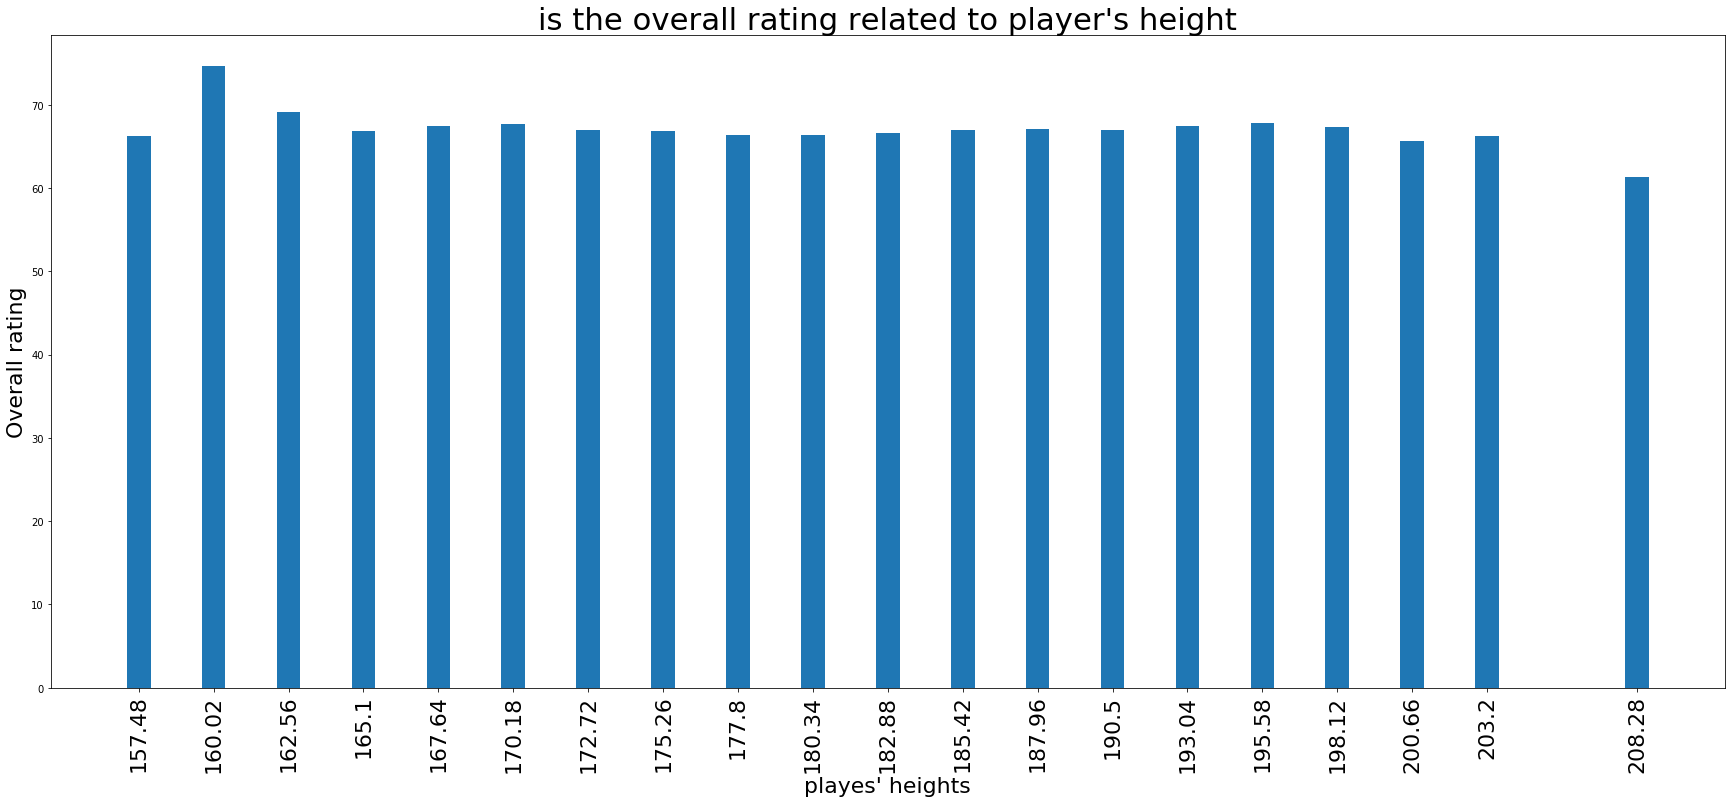

In [54]:
#using the function to avoid repeatitive code
loc = player_height_overall['height']
values = player_height_overall['overall_rating']
label
bar_plot(loc,values ,loc , rot = 'vertical' , x_title = 'playes\' heights' ,y_title = 'Overall rating' , plot_title ='is the overall rating related to player\'s height', fsz = 22)

#### Plotting area

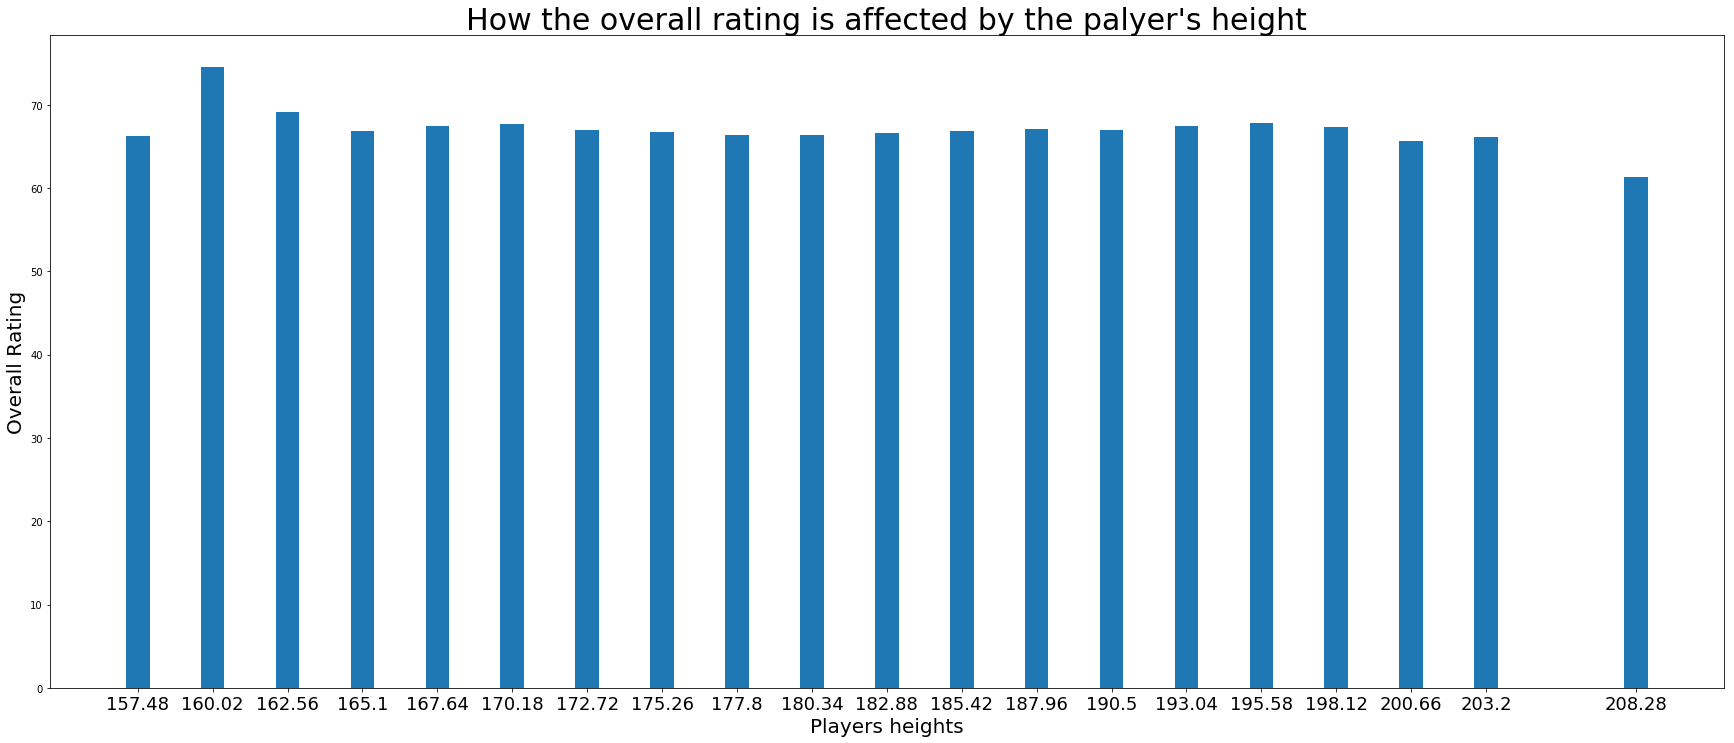

In [55]:
# plotting area using matplotlib withut the function
# naming x_axis values
labels = player_height_overall['height']
#plotting
plt.bar(labels , values)# , tick_label = labels)
plt.xticks(labels , labels , fontsize = 18 , rotation = 'horizontal')
plt.xlabel('Players heights',fontsize = 20)
plt.ylabel('Overall Rating',fontsize = 20)
plt.title("How the overall rating is affected by the palyer's height",fontsize = 30)
plt.legend()
plt.show()

#### Conclusion
### From the graph we can conclude that the players that have 160 cm tall are having the highest overall rating

# let's try to answer the fourth question in the next few cells
### what is the most powerful league and how other leagues is if compared to the strongest one

### Check the nature of data

In [56]:
# match table was checked for quality in Q1

In [57]:
league.shape

(11, 3)

In [58]:
league.dtypes

id             int64
country_id     int64
name          object
dtype: object

In [59]:
league.isnull().any()

id            False
country_id    False
name          False
dtype: bool

In [60]:
league.duplicated().any()

False

In [61]:
# preparing data to plot
match['date'] = pd.to_datetime(match['date'])

In [62]:
# to be able to extract year from time we have to parse date
match['date'] = pd.to_datetime(match['date'])

#### Adding and slicing data need in the analysis

In [63]:
# extracting year from date
match['year'] = match['date'].dt.year
match['year'].unique() # needs to be deleted

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [64]:
# getting the sum of goals for each 
leagues_goals = match.groupby(['league_id','country_id','year'],as_index=False).sum()
leagues_goals['year'].head()  # needs to be deleted

0    2008
1    2009
2    2010
3    2011
4    2012
Name: year, dtype: int64

In [65]:
# extracting the column we are interested in 
leagues_goals = leagues_goals[['league_id','country_id','home_team_goal','away_team_goal','year']]
leagues_goals.head()  #delete

,league_id,country_id,home_team_goal,away_team_goal,year
0,1,1,262,175,2008
1,1,1,452,359,2009
2,1,1,371,259,2010
3,1,1,362,246,2011
4,1,1,454,350,2012


In [66]:
# adding a total goal column 
leagues_goals['total_goals'] = leagues_goals['home_team_goal'] + leagues_goals['away_team_goal']
leagues_goals.head() #delete

,league_id,country_id,home_team_goal,away_team_goal,year,total_goals
0,1,1,262,175,2008,437
1,1,1,452,359,2009,811
2,1,1,371,259,2010,630
3,1,1,362,246,2011,608
4,1,1,454,350,2012,804


In [67]:
# slicing the id and name of laegue of league table to and merging them to league_goals table
leagues_goals = league.iloc[:,[0,2]].merge(leagues_goals , how='inner',left_on='id',right_on='league_id')
leagues_goals.head()   # delete

,id,name,league_id,country_id,home_team_goal,away_team_goal,year,total_goals
0,1,Belgium Jupiler League,1,1,262,175,2008,437
1,1,Belgium Jupiler League,1,1,452,359,2009,811
2,1,Belgium Jupiler League,1,1,371,259,2010,630
3,1,Belgium Jupiler League,1,1,362,246,2011,608
4,1,Belgium Jupiler League,1,1,454,350,2012,804


In [68]:
# slicing the data i am interested in 
leagues_goals = leagues_goals.iloc[:,[0,1,3,4,5,6,7]]
leagues_goals.head()    #delete

,id,name,country_id,home_team_goal,away_team_goal,year,total_goals
0,1,Belgium Jupiler League,1,262,175,2008,437
1,1,Belgium Jupiler League,1,452,359,2009,811
2,1,Belgium Jupiler League,1,371,259,2010,630
3,1,Belgium Jupiler League,1,362,246,2011,608
4,1,Belgium Jupiler League,1,454,350,2012,804


In [69]:
# grouping by country id , county_id ,and name for each year to and using sum method to get the total goals
leagues_goals = leagues_goals.groupby(['id','country_id','name','year'],as_index=False).sum()
# soriting to get the top leagues
leagues_goals = leagues_goals.sort_values(['id','country_id','year','total_goals'])
leagues_goals.head()

,id,country_id,name,year,home_team_goal,away_team_goal,total_goals
0,1,1,Belgium Jupiler League,2008,262,175,437
1,1,1,Belgium Jupiler League,2009,452,359,811
2,1,1,Belgium Jupiler League,2010,371,259,630
3,1,1,Belgium Jupiler League,2011,362,246,608
4,1,1,Belgium Jupiler League,2012,454,350,804


In [70]:
leagues_goals['year'].head()             # delete

0    2008
1    2009
2    2010
3    2011
4    2012
Name: year, dtype: int64

In [71]:
df_for_question_4 = leagues_goals.groupby(['id','country_id','name'],as_index=False).sum().sort_values('total_goals',ascending=False)
# delete 
df_for_question_4.head()             #delete

,id,country_id,name,year,home_team_goal,away_team_goal,total_goals
9,21518,21518,Spain LIGA BBVA,18108,4959,3453,8412
1,1729,1729,England Premier League,18108,4715,3525,8240
4,10257,10257,Italy Serie A,18108,4528,3367,7895
5,13274,13274,Netherlands Eredivisie,18108,4357,3185,7542
2,4769,4769,France Ligue 1,18108,4265,3162,7427


In [72]:
leagues_goals['year'].head()             # delete

0    2008
1    2009
2    2010
3    2011
4    2012
Name: year, dtype: int64

In [73]:
#delete
df_for_question_4['total_goals'][:5].tolist()
# delete
df_for_question_4.head(7)

,id,country_id,name,year,home_team_goal,away_team_goal,total_goals
9,21518,21518,Spain LIGA BBVA,18108,4959,3453,8412
1,1729,1729,England Premier League,18108,4715,3525,8240
4,10257,10257,Italy Serie A,18108,4528,3367,7895
5,13274,13274,Netherlands Eredivisie,18108,4357,3185,7542
2,4769,4769,France Ligue 1,18108,4265,3162,7427
3,7809,7809,Germany 1. Bundesliga,18108,3982,3121,7103
7,17642,17642,Portugal Liga ZON Sagres,18108,2890,2311,5201


In [74]:
df_for_question_4['name'][:5].tolist()          # delete

['Spain LIGA BBVA',
 'England Premier League',
 'Italy Serie A',
 'Netherlands Eredivisie',
 'France Ligue 1']

#### Creating data to be plotted

In [75]:
locations = np.arange(len(df_for_question_4['name'][:12].tolist()))     # for x-coordinates 

In [76]:
#10 df_for_question_4.sort_values('total_goals',ascending=False).head()     # delete

In [77]:
# data for y-axis
values = df_for_question_4['total_goals'][:12].tolist()


In [78]:
#naming x-axis locations
labels = df_for_question_4['name'].unique()[:12].tolist()

#### plotting area

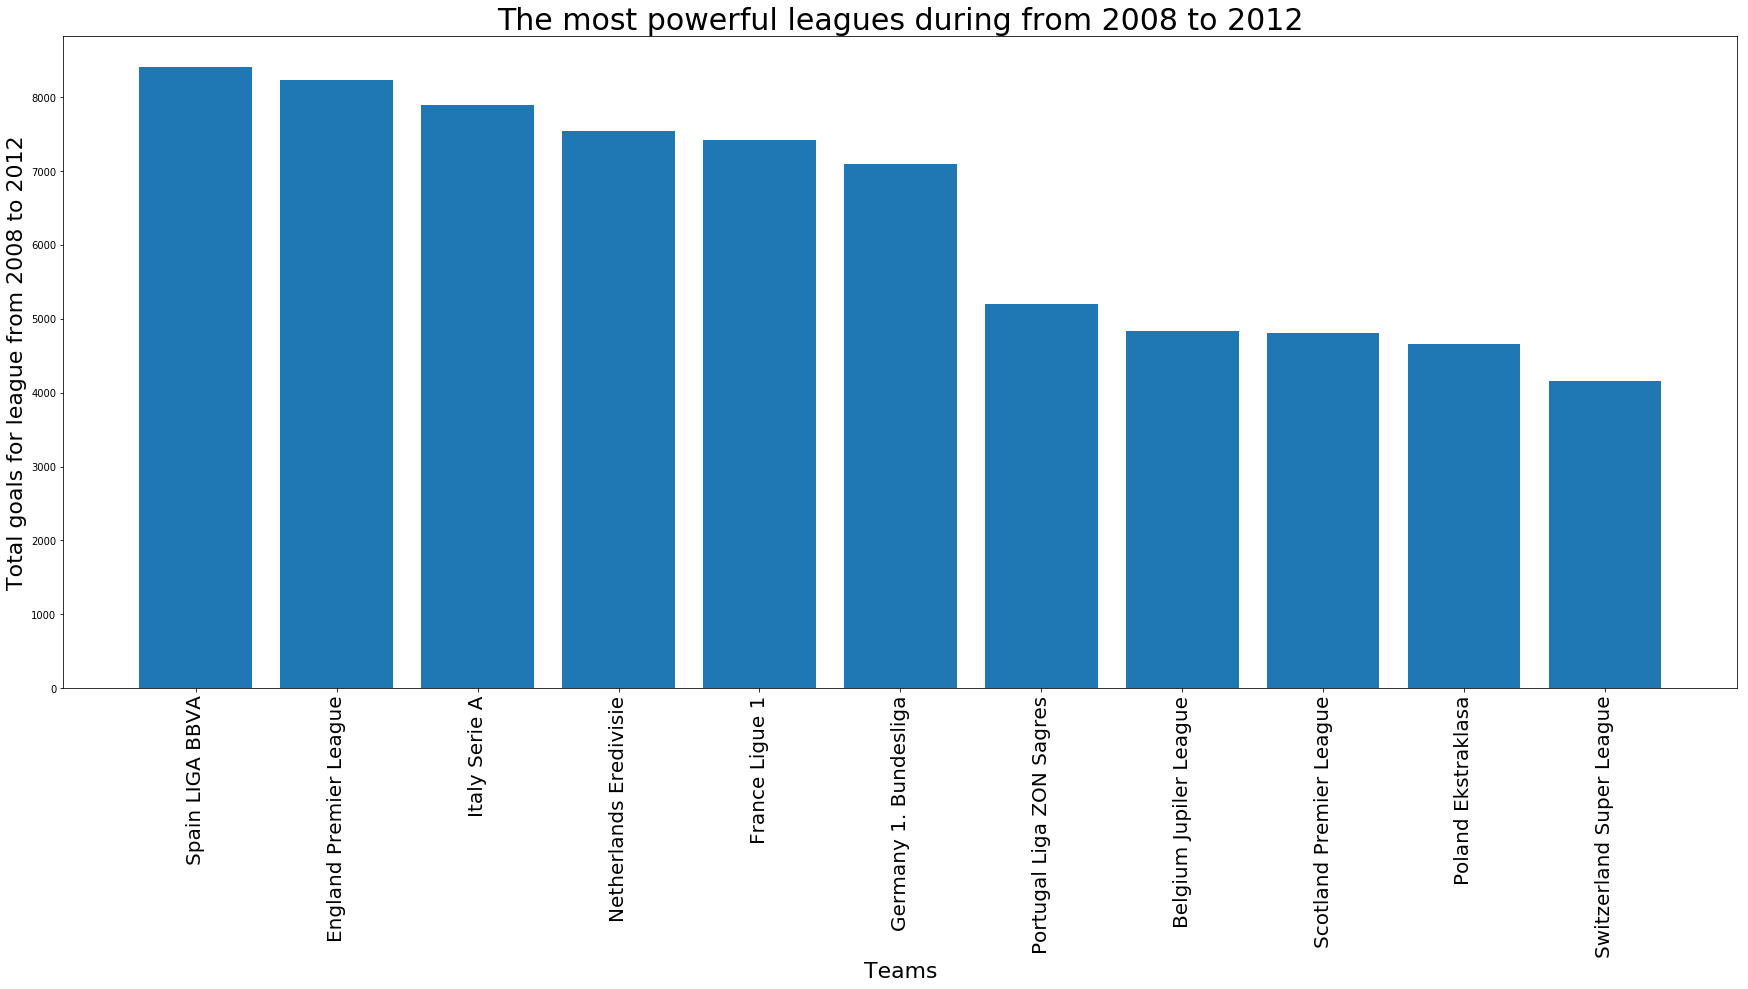

In [79]:
# ploting area
#preparing data to be plotted 
plt.bar(locations, values ,tick_label= labels )
plt.xticks(rotation ='vertical',fontsize = 20)
plt.xlabel('Teams',fontsize = 22)
plt.ylabel('Total goals for league from 2008 to 2012',fontsize = 22)
plt.title('The most powerful leagues during from 2008 to 2012',fontsize = 30)
plt.legend()
plt.show()


#### Deduction
### The most powerful league is spain LIGA BBVA with more than 8000 goals

# here i am trying to answer my fifth question
# how the variation of the leagues goals during this duration

#### data nature for these data sets is checked before so no need to repeat it

#### Creating data to be plotted

In [80]:
unique_leagues = leagues_goals.groupby(['id','country_id','name'],as_index = False).sum().sort_values('total_goals',ascending =False )
unique_leagues = unique_leagues['id'].unique().tolist()[:4]   
unique_leagues#delete

[21518, 1729, 10257, 13274]

#### Plotting Area

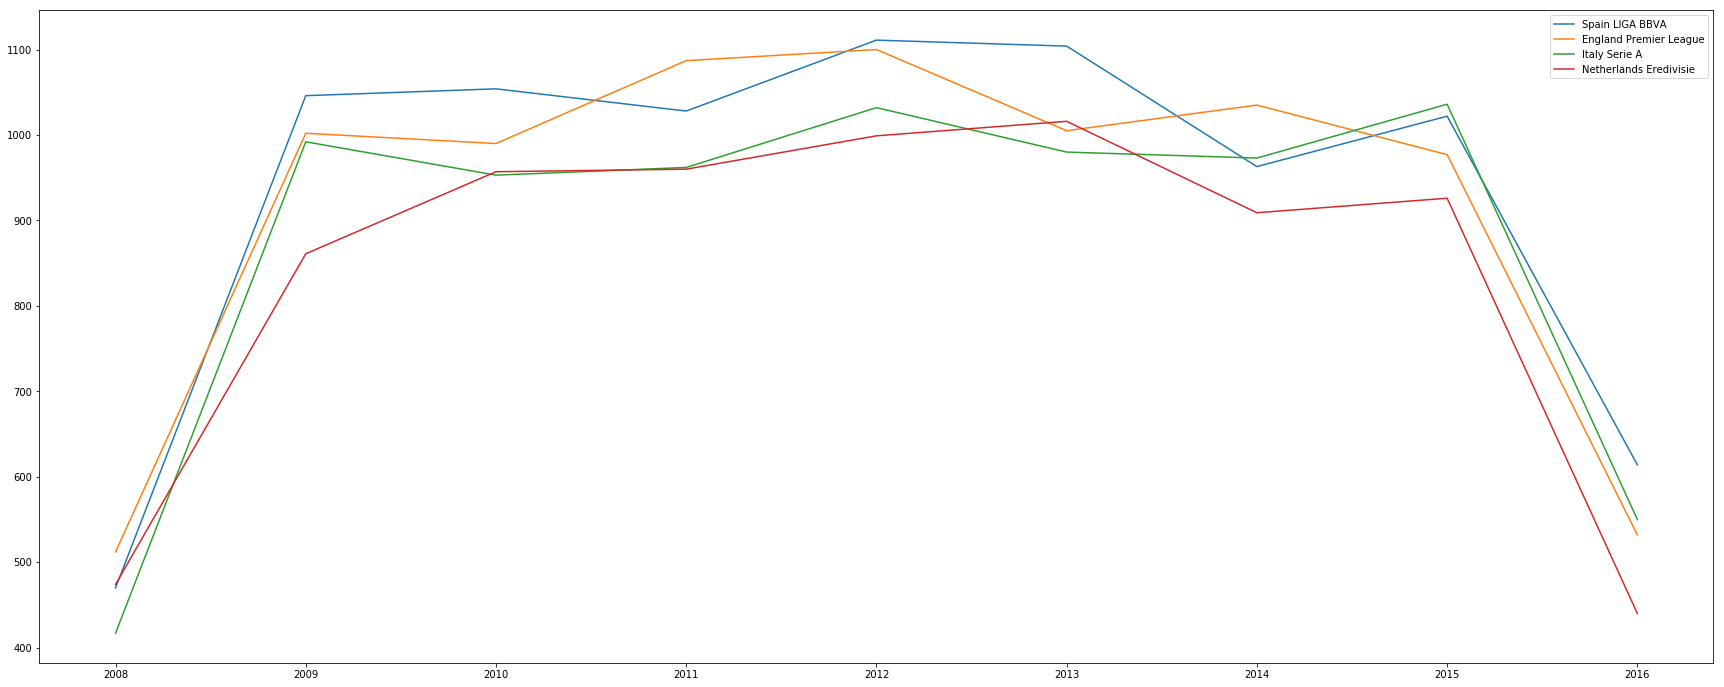

In [81]:
#for plotting
# here i will use the year as x-variable
###unique_leagues = leagues_goals['id'].unique().tolist()[:4]

# i will use a for loop for plotting rather than repeating the same steps
#for many times and here is the great benefit of programmig
    
for x in unique_leagues :
    # creating x-coordinates of years to plot on
    unique_lega = leagues_goals.query('id == {}'.format(x))['year'].unique().tolist()
    # creatting the values of total goals (Y-axis)
    league_x = (leagues_goals.query('id == {}'.format(x))['total_goals'].tolist())
    # labels on x 
    labels_on_x_axis='{}'.format(str(df_for_question_4.sort_values('total_goals',ascending=False).query('id == {}'.format(x))['name'].tolist()[0]))
    plt.plot(unique_lega , league_x , label = labels_on_x_axis)
    plt.legend()


#### Concusion
### From this chart we can see the variation of leagues goals indicating the competency of each league  

### from this graph we can track the number of goals kpi that indicates the competency of any league

### From the graph above we can deduce that barcelona has the most ability to score in away matches

### Question six (univariable)
### how the distribution of players' heights is ??

In [82]:
# number of records
player.iloc[: ,[0,5]].shape

(11060, 2)

In [83]:
# types of data
player.iloc[: ,[0,5]].dtypes

id          int64
height    float64
dtype: object

In [84]:
# is their any null values ?
player.iloc[: ,[0,5]].isnull().any()      #in this case isnull method does not effect our analysis

id        False
height    False
dtype: bool

In [85]:
player.iloc[: ,[0,5]].duplicated().any()

False

In [86]:
# let's get some statistical note about player's height
player.iloc[: , 5].describe()

count    11060.000000
mean       181.867445
std          6.369201
min        157.480000
25%        177.800000
50%        182.880000
75%        185.420000
max        208.280000
Name: height, dtype: float64

In [87]:
length_list = player.iloc[: , 5].tolist()
#print(length_list)     #delete

#print(weight_list)     #delete
weight_list = player.iloc[: , 6].tolist()


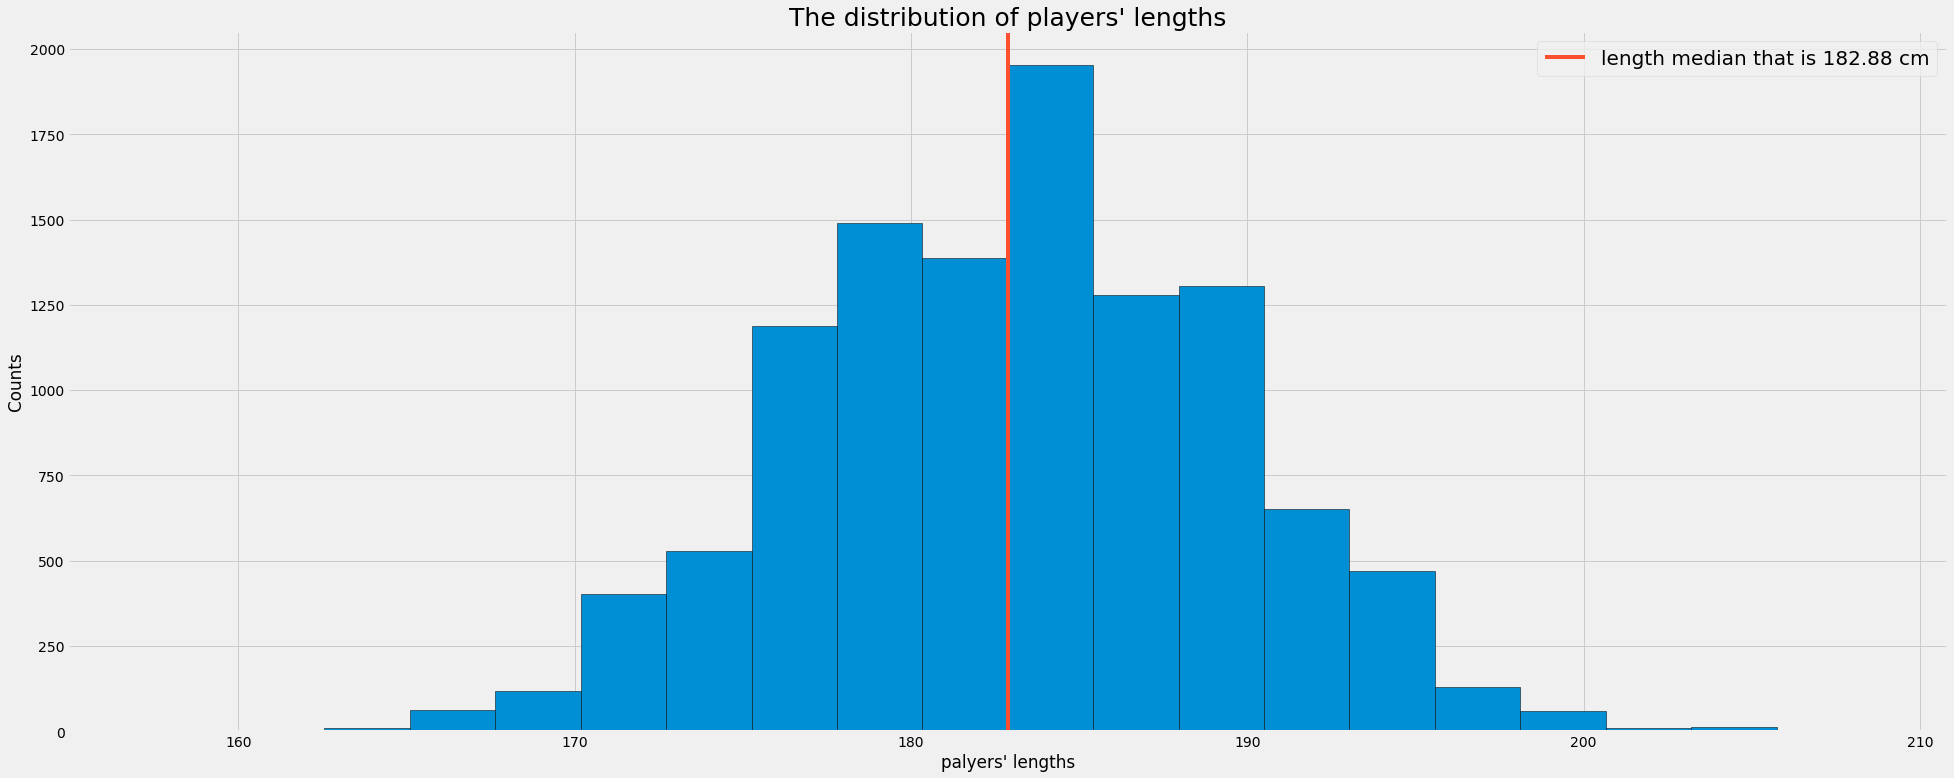

In [88]:
# distribution of football players
plt.style.use('fivethirtyeight')
plt.hist(length_list , bins = 20 , edgecolor='black')
plt.title('The distribution of players\' lengths',fontsize = 25)
plt.xlabel("palyers' lengths")
plt.ylabel("Counts")
median = player.iloc[: , 5].median()
plt.axvline(median,color = '#fc4f30',label = 'length median that is {} cm'.format(median) )
plt.legend(fontsize = 20)
plt.show()

# how the distribution of players' weights is ??

In [89]:
# number of records
player.iloc[: ,[0,6]].shape

(11060, 2)

In [90]:
player.iloc[: ,[0,6]].dtypes

id        int64
weight    int64
dtype: object

In [91]:
player.iloc[: ,[0,6]].isnull().any()  #in this case isnull method does not effect our analysis

id        False
weight    False
dtype: bool

In [92]:
player.iloc[: ,[0,6]].duplicated().any()

False

In [93]:
# let's some statistics about player's weights
player.iloc[: , 6].describe()

count    11060.000000
mean       168.380289
std         14.990217
min        117.000000
25%        159.000000
50%        168.000000
75%        179.000000
max        243.000000
Name: weight, dtype: float64

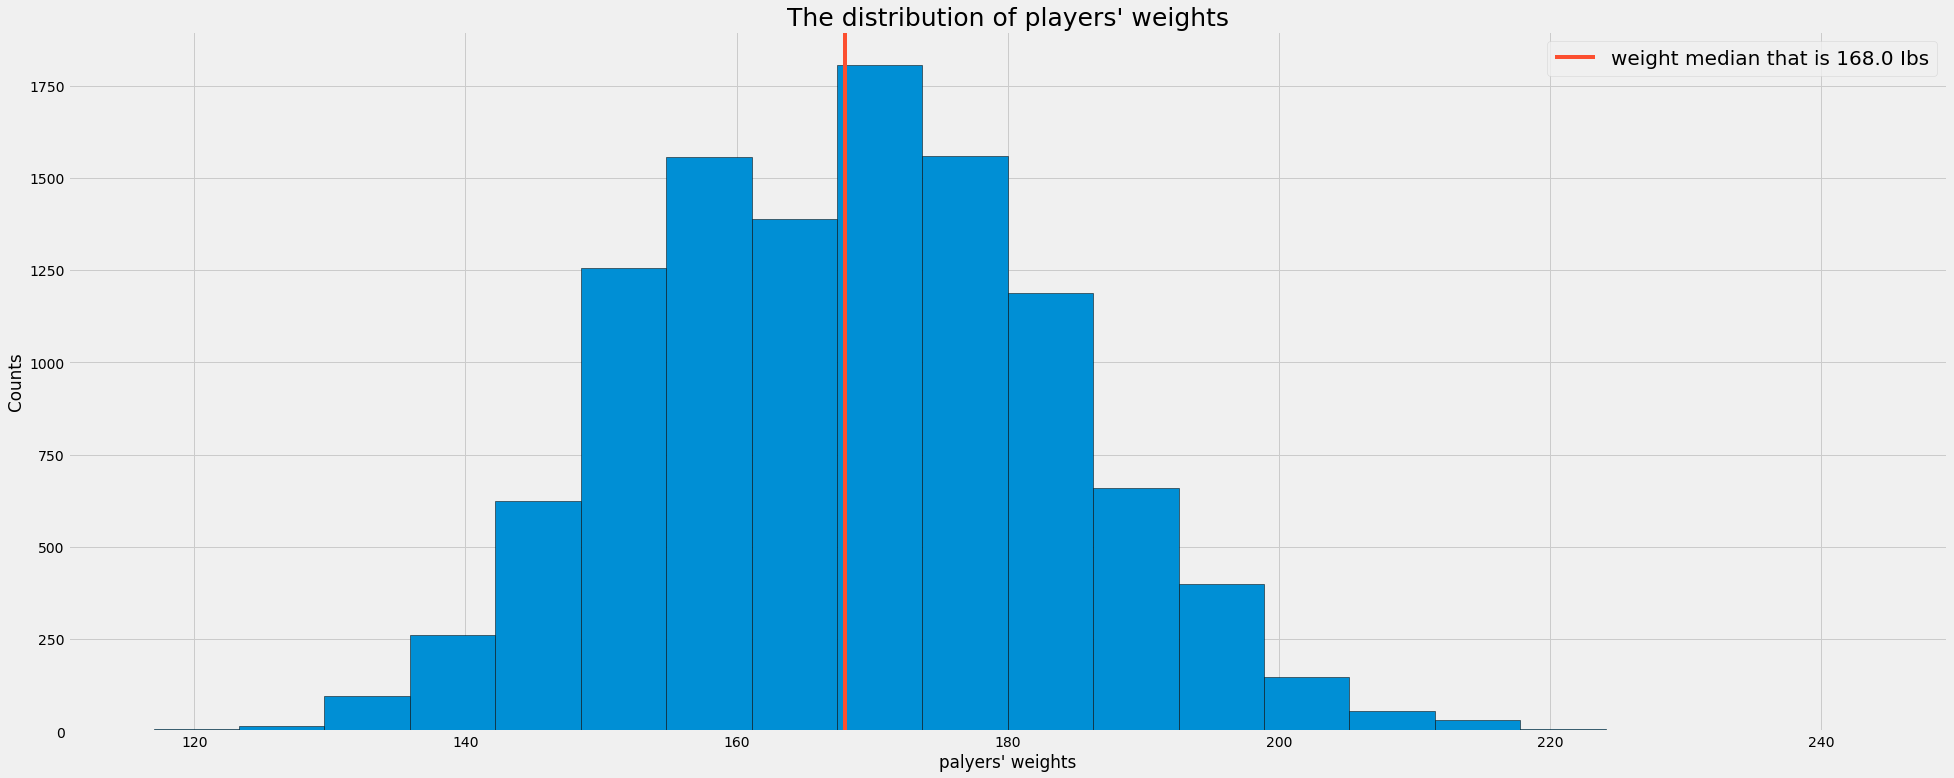

In [94]:
# distribution of football players
plt.style.use('fivethirtyeight')
plt.hist(weight_list, bins = 20 , edgecolor='black')   
plt.title('The distribution of players\' weights',fontsize = 25)
plt.xlabel("palyers' weights")
plt.ylabel("Counts")
median = player.iloc[: , 6].median()
plt.axvline(median,color = '#fc4f30',label = 'weight median that is {} Ibs'.format(median) )
plt.legend(fontsize = 20)
plt.show()

In [95]:
# here let's analyse another univariate variable that is how may palyer who prefer their right and left legs

In [96]:
# count the number of right_preferred_foot
right = player_attributes.iloc[:,[0,6]].query("preferred_foot == 'right' ").count()[1] 
# count the number of left_preferred_foot
left = player_attributes.iloc[:,[0,6]].query("preferred_foot == 'left' ").count()[1] 

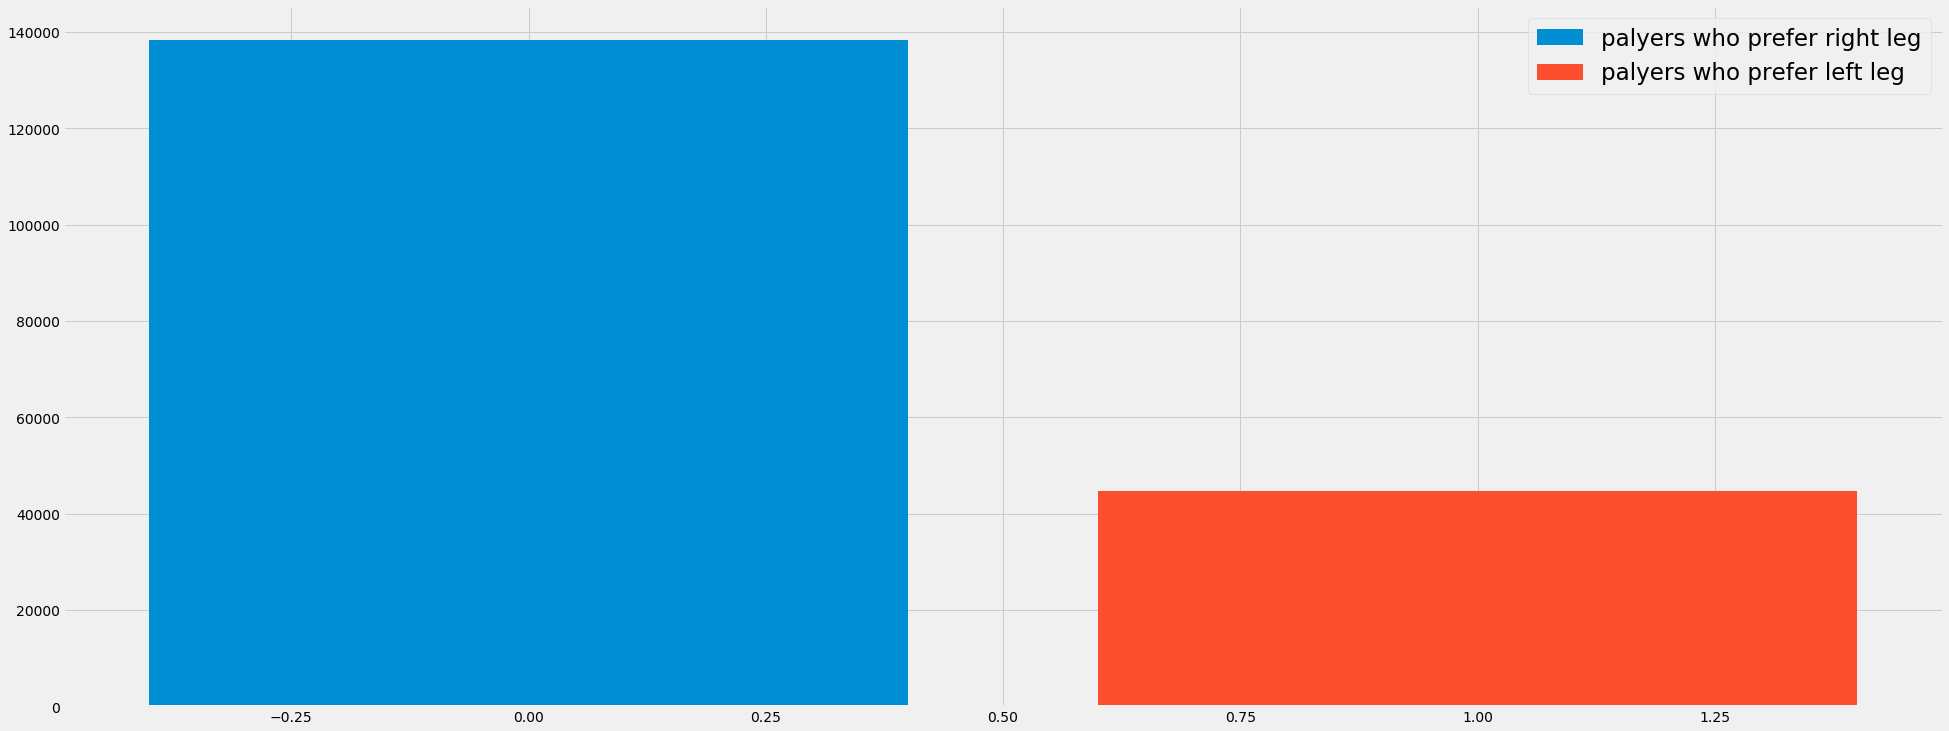

In [97]:
plt.bar([0] , right,label = 'palyers who prefer right leg') 
plt.bar([1] , left ,label = 'palyers who prefer left leg' )
plt.legend(fontsize = 23)
plt.show()

<a id='conclusions'></a>
## Conclusions

### 1 - It seems to a very far extent that a team is always capable of scoring goals in his land more that away matches
### 2 - The most scorring team that is FC Barcelona score about 12 home goals for each 10 away goals¶
### 3 - players who are 160 cm tall are having the highest overall rating
### 4 - The most powerful league is spain LIGA BBVA with more than 8000 goals from 2008 to 2012


# Limitation section

### i have used soccer data sets got it from kaggle , i have concentarated on players characterristics , matches statistics  , teams records , and leagues .
### In my analysis i did not use any other source for any alike statistics
### I have foccused on playes characteristics , teams records and their related leagues 

## This dataset contains
### +25,000 matches
### +10,000 players
### 11 European Countries with their lead championship
### Seasons 2008 to 2016
### Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
### Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches

### Data was ready except for some dates that i had to convert them to datetime
### Normalization was not needed for my anlaysis
### I have already faced some null values which i dropped as they did not exceded 0.45% of total dataset 

In [98]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0